In [105]:
from matplotlib import pyplot as plt

import numpy as np

import time

from IPython import display

%matplotlib inline

In [134]:
Tmin = 24
Tmax = 25
Nx = 32
Ny = 32
img = (Tmax-Tmin)*np.random.rand(Nx,Ny)+Tmin

In [135]:
def _apply_boundary_conditions(img):
    img[0,:] = 0.
    img[:,Ny-1] = 30.
    img[Nx-1,:] = 0.
    img[:,0] = 15.
    return img

def _propagate(img,dt,dx,dy,n_steps=1):
    new_img = img.copy()
    new_img[1:-1:,1:-1:] = img[1:-1:, 1:-1:] + dt*(np.diff(img, n=2, axis=0)[:,1:-1:]/(dx*dx) \
                                               + np.diff(img, n=2, axis=1)[1:-1:,:]/(dy*dy))

    return _apply_boundary_conditions(
        new_img
    )

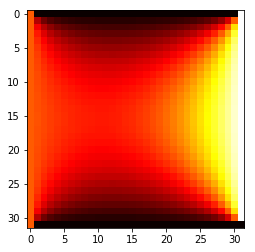

KeyboardInterrupt: 

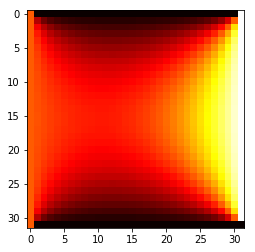

In [136]:
#plt.ion()
fig,ax = plt.subplots(1,1)
for i  in range(10000):
    img = _propagate(img,dt=0.2,dx=1.,dy=1.)
  
    if (i%20 == 0):
        print(np.median(img))
        plt.imshow(img, cmap='hot', interpolation='nearest')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.5)


In [121]:
img

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 24.9821828 ,  12.71149912,   8.05866756, ...,   7.96652473,
         12.50685175,  24.42655312],
       [ 24.84904006,  17.80514613,  13.41974571, ...,  13.30667223,
         17.63432913,  24.58690403],
       ..., 
       [ 24.64252612,  17.65300672,  13.33001721, ...,  13.29589071,
         17.67311727,  24.98871129],
       [ 24.26848622,  12.47185407,   7.96592336, ...,   7.94356269,
         12.43424326,  24.12029308],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])